In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as stat
from sklearn import preprocessing

In [2]:
import types
import pandas as pd

body = "EmployData2.csv"
df = pd.read_csv(body, encoding = "cp1252")
df.head()

/usr/local/share/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (10,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


country                city  \
0  Netherlands           Amsterdam   
1  Netherlands           Amsterdam   
2  Netherlands           Amsterdam   
3  Netherlands  Amsterdam-Zuidoost   
4  Netherlands  Amsterdam-Zuidoost   

                                             transit  \
0  The tram is close by, line 1, 7 and 17. They w...   
1  In less then 5 minutes you will find public tr...   
2  several trams and buses on a 5-minute walk dis...   
3                                               None   
4                                               None   

                                        access  host_since  \
0  You will have acces to the whole apartment.  2014-03-03   
1                                         None  2014-07-17   
2                                          all  2013-07-17   
3                                         None  2016-11-27   
4                                         None  2016-06-26   

   host_response_time host_response_rate          state property_type  \
0      within an hour                100  Noord Holland     Apartment   
1  within a few hours                100             NH     Apartment   
2  within a few hours                100  Noord-Holland         House   
3        within a day                 68  Noord-Holland     Apartment   
4  within a few hours                100  Noord-Holland     Apartment   

         room_type  ... price security_deposit cleaning_fee guests_included  \
0  Entire home/apt  ...   130              200           40               2   
1  Entire home/apt  ...   100              200           20               1   
2  Entire home/apt  ...   118             None         None               1   
3     Private room  ...    29             None           10               1   
4  Entire home/apt  ...   130             None           30               1   

  extra_people minimum_nights maximum_nights number_of_reviews  \
0           20              2           1125                 4   
1           10              2           1125                 2   
2            0              2             15                 0   
3            5              2           1125                12   
4            0              3              7                10   

  review_scores_rating cancellation_policy  
0                  100              strict  
1                  100            flexible  
2                 None              strict  
3                   88            moderate  
4                   98            flexible  

[5 rows x 26 columns]

In [3]:
accesses = df['access'].values  #.astype(float)
accesses_ls = []
for access in accesses:
    access = str(access)
    if 'all' in access or 'whole' in access or 'entire' in access:
        accesses_ls.append(3)
    elif access == "" or access == "None":
        accesses_ls.append(1)
    else:
        accesses_ls.append(2)
df['access'] = accesses_ls

country                city  \
0  Netherlands           Amsterdam   
1  Netherlands           Amsterdam   
2  Netherlands           Amsterdam   
3  Netherlands  Amsterdam-Zuidoost   
4  Netherlands  Amsterdam-Zuidoost   

                                             transit  access  host_since  \
0  The tram is close by, line 1, 7 and 17. They w...       3  2014-03-03   
1  In less then 5 minutes you will find public tr...       1  2014-07-17   
2  several trams and buses on a 5-minute walk dis...       3  2013-07-17   
3                                               None       1  2016-11-27   
4                                               None       1  2016-06-26   

   host_response_time host_response_rate          state property_type  \
0      within an hour                100  Noord Holland     Apartment   
1  within a few hours                100             NH     Apartment   
2  within a few hours                100  Noord-Holland         House   
3        within a day                 68  Noord-Holland     Apartment   
4  within a few hours                100  Noord-Holland     Apartment   

         room_type  ... price security_deposit cleaning_fee guests_included  \
0  Entire home/apt  ...   130              200           40               2   
1  Entire home/apt  ...   100              200           20               1   
2  Entire home/apt  ...   118             None         None               1   
3     Private room  ...    29             None           10               1   
4  Entire home/apt  ...   130             None           30               1   

  extra_people minimum_nights maximum_nights number_of_reviews  \
0           20              2           1125                 4   
1           10              2           1125                 2   
2            0              2             15                 0   
3            5              2           1125                12   
4            0              3              7                10   

  review_scores_rating cancellation_policy  
0                  100              strict  
1                  100            flexible  
2                 None              strict  
3                   88            moderate  
4                   98            flexible  

[5 rows x 26 columns]

In [123]:
amenities = df['amenities'].values  #.astype(float)
amenities_ls = []
for amenity in amenities:
    count = 1
    amenity = str(amenity)
    if amenity == "":
        amenities_ls.append(0)
    else:
        for char in amenity:
            if char == ",":
                count += 1
        amenities_ls.append(count)
df['amenities'] = amenities_ls
df.head()

country                city  \
0  Netherlands           Amsterdam   
1  Netherlands           Amsterdam   
2  Netherlands           Amsterdam   
3  Netherlands  Amsterdam-Zuidoost   
4  Netherlands  Amsterdam-Zuidoost   

                                             transit  access  host_since  \
0  The tram is close by, line 1, 7 and 17. They w...     3.0  2014-03-03   
1  In less then 5 minutes you will find public tr...     1.0  2014-07-17   
2  several trams and buses on a 5-minute walk dis...     3.0  2013-07-17   
3                                                        1.0  2016-11-27   
4                                                        1.0  2016-06-26   

   host_response_time  host_response_rate          state property_type  \
0      within an hour               100.0  Noord Holland     Apartment   
1  within a few hours               100.0             NH     Apartment   
2  within a few hours               100.0  Noord-Holland         House   
3        within a day                68.0  Noord-Holland     Apartment   
4  within a few hours               100.0  Noord-Holland     Apartment   

         room_type  ...  price  security_deposit  cleaning_fee  \
0  Entire home/apt  ...  130.0             200.0          40.0   
1  Entire home/apt  ...  100.0             200.0          20.0   
2  Entire home/apt  ...  118.0               0.0           0.0   
3     Private room  ...   29.0               0.0          10.0   
4  Entire home/apt  ...  130.0               0.0          30.0   

   guests_included extra_people  minimum_nights  maximum_nights  \
0              2.0         20.0             2.0          1125.0   
1              1.0         10.0             2.0          1125.0   
2              1.0          0.0             2.0            15.0   
3              1.0          5.0             2.0          1125.0   
4              1.0          0.0             3.0             7.0   

   number_of_reviews  review_scores_rating  cancellation_policy  
0                4.0                 100.0               strict  
1                2.0                 100.0             flexible  
2                0.0                   0.0               strict  
3               12.0                  88.0             moderate  
4               10.0                  98.0             flexible  

[5 rows x 26 columns]

In [73]:
headers = ['country', 'city', 'transit', 'access', 'host_since', 'host_response_time', 'host_response_rate', 'state', 'property_type', 'room_type', 'accommodates', 'bathrooms', 
          'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
          'number_of_reviews', 'review_scores_rating', 'cancellation_policy' ]
for col in headers:
    try:
        float(df[col][0])
        df[col].replace("None",0,inplace=True)
        df[col]=pd.to_numeric(df[col], downcast='float')
    except:
        df[col].replace("None","",inplace=True)

In [74]:
df.head()

country                city  \
0  Netherlands           Amsterdam   
1  Netherlands           Amsterdam   
2  Netherlands           Amsterdam   
3  Netherlands  Amsterdam-Zuidoost   
4  Netherlands  Amsterdam-Zuidoost   

                                             transit  access  host_since  \
0  The tram is close by, line 1, 7 and 17. They w...     3.0  2014-03-03   
1  In less then 5 minutes you will find public tr...     1.0  2014-07-17   
2  several trams and buses on a 5-minute walk dis...     3.0  2013-07-17   
3                                                        1.0  2016-11-27   
4                                                        1.0  2016-06-26   

   host_response_time  host_response_rate          state property_type  \
0      within an hour               100.0  Noord Holland     Apartment   
1  within a few hours               100.0             NH     Apartment   
2  within a few hours               100.0  Noord-Holland         House   
3        within a day                68.0  Noord-Holland     Apartment   
4  within a few hours               100.0  Noord-Holland     Apartment   

         room_type  ...  price  security_deposit  cleaning_fee  \
0  Entire home/apt  ...  130.0             200.0          40.0   
1  Entire home/apt  ...  100.0             200.0          20.0   
2  Entire home/apt  ...  118.0               0.0           0.0   
3     Private room  ...   29.0               0.0          10.0   
4  Entire home/apt  ...  130.0               0.0          30.0   

   guests_included extra_people  minimum_nights  maximum_nights  \
0              2.0         20.0             2.0          1125.0   
1              1.0         10.0             2.0          1125.0   
2              1.0          0.0             2.0            15.0   
3              1.0          5.0             2.0          1125.0   
4              1.0          0.0             3.0             7.0   

   number_of_reviews  review_scores_rating  cancellation_policy  
0                4.0                 100.0               strict  
1                2.0                 100.0             flexible  
2                0.0                   0.0               strict  
3               12.0                  88.0             moderate  
4               10.0                  98.0             flexible  

[5 rows x 26 columns]

In [76]:
df['amenities'].unique()

array([13., 12., 18., 17., 16.,  8., 14., 22., 19., 11.,  7., 10., 23.,
       15.,  6., 20., 21., 24.,  9.,  0., 25.,  4.,  5., 26.,  2., 30.,
       27.,  3., 29., 28., 31., 32., 34.,  1., 55., 33., 48., 38., 50.,
       42., 45., 39., 35., 36., 49., 37., 40., 41., 56., 43., 46., 51.,
       52., 53., 44., 47., 60., 62., 66., 64., 54., 87., 58., 68., 72.,
       57., 81., 59.])

In [77]:
df1 = df[['country', 'host_response_rate', 'room_type', 'bathrooms','beds', 'bed_type','price','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating','cancellation_policy', 'accommodates', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'access', 'amenities']]

In [78]:
df1.isnull().sum()

country                 0
host_response_rate      0
room_type               0
bathrooms               0
beds                    0
bed_type                0
price                   0
minimum_nights          0
maximum_nights          0
number_of_reviews       0
review_scores_rating    0
cancellation_policy     0
accommodates            0
security_deposit        0
cleaning_fee            0
guests_included         0
extra_people            0
access                  0
amenities               0
dtype: int64

In [79]:
df1.dtypes

country                  object
host_response_rate      float32
room_type                object
bathrooms               float32
beds                    float32
bed_type                 object
price                   float32
minimum_nights          float32
maximum_nights          float32
number_of_reviews       float32
review_scores_rating    float32
cancellation_policy      object
accommodates            float32
security_deposit        float32
cleaning_fee            float32
guests_included         float32
extra_people            float32
access                  float32
amenities               float32
dtype: object

In [80]:
#remove special character % from host_response_rate
df1 = df1.replace('\%','',regex=True)

df_filtered = df1[df1.room_type != '9']
df_filtered = df1[df1.room_type != '']
df_filtered = df1[df1.country != '']
df_filtered = df1[df1.country != '0']
df_filtered = df1[df1.country != '9']
df_filtered = df1[df1.bed_type != '9']
df_filtered = df1[df1.bed_type != '']
df_filtered = df1[df1.cancellation_policy != '']
df_filtered.describe

<bound method NDFrame.describe of             country  host_response_rate        room_type  bathrooms  beds  \
0       Netherlands               100.0  Entire home/apt        1.0   1.0   
1       Netherlands               100.0  Entire home/apt        1.0   2.0   
2       Netherlands               100.0  Entire home/apt        1.0   1.0   
3       Netherlands                68.0     Private room        1.0   2.0   
4       Netherlands               100.0  Entire home/apt        1.5   3.0   
5       Netherlands                95.0     Private room        1.0   1.0   
6       Netherlands               100.0  Entire home/apt        1.0   2.0   
7       Netherlands               100.0  Entire home/apt        1.0   2.0   
8       Netherlands               100.0  Entire home/apt        2.0   3.0   
9       Netherlands               100.0     Private room        1.0   1.0   
10      Netherlands               100.0     Private room        1.0   1.0   
11      Netherlands               100.0  E

In [81]:
countries = df_filtered['country'].unique()
print(countries)

['Netherlands' 'United States' 'Belgium' 'Greece' 'Spain' 'Germany'
 'France' 'Canada' 'Australia' '' 'United Kingdom' 'Hong Kong' 'China'
 'Switzerland' 'Denmark' 'Ireland' 'Italy' 'Austria' 'Vatican City'
 'Vanuatu' 'Cuba' 'Mexico' 'Uruguay']


In [82]:
df_filtered['cancellation_policy'] = df_filtered['cancellation_policy'].replace(['super_strict_60','super_strict_30','strict_new','super_strict_60_new','super_strict_30_new','long_term'],'strict')
df_filtered['cancellation_policy'] = df_filtered['cancellation_policy'].replace(['flexible_new'],'flexible')
df_filtered['cancellation_policy'] = df_filtered['cancellation_policy'].replace(['moderate_new'],'moderate')
df_filtered[df_filtered.cancellation_policy != '']

/usr/local/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

country  host_response_rate        room_type  bathrooms  beds  \
0       Netherlands               100.0  Entire home/apt        1.0   1.0   
1       Netherlands               100.0  Entire home/apt        1.0   2.0   
2       Netherlands               100.0  Entire home/apt        1.0   1.0   
3       Netherlands                68.0     Private room        1.0   2.0   
4       Netherlands               100.0  Entire home/apt        1.5   3.0   
5       Netherlands                95.0     Private room        1.0   1.0   
6       Netherlands               100.0  Entire home/apt        1.0   2.0   
7       Netherlands               100.0  Entire home/apt        1.0   2.0   
8       Netherlands               100.0  Entire home/apt        2.0   3.0   
9       Netherlands               100.0     Private room        1.0   1.0   
10      Netherlands               100.0     Private room        1.0   1.0   
11      Netherlands               100.0  Entire home/apt        1.0   1.0   
12      Netherlands                67.0  Entire home/apt        1.0   1.0   
13      Netherlands               100.0     Private room        2.5   1.0   
14      Netherlands                93.0  Entire home/apt        2.0   3.0   
15      Netherlands               100.0  Entire home/apt        1.0   3.0   
16      Netherlands               100.0  Entire home/apt        2.0   8.0   
17      Netherlands               100.0  Entire home/apt        1.0   1.0   
18      Netherlands               100.0     Private room        1.0   5.0   
19      Netherlands                 0.0  Entire home/apt        1.0   6.0   
20      Netherlands                80.0     Private room        1.5   1.0   
21      Netherlands                96.0  Entire home/apt        1.0   3.0   
22      Netherlands               100.0     Private room        1.0   3.0   
23      Netherlands                90.0  Entire home/apt        1.0   3.0   
24      Netherlands               100.0     Private room        1.5   2.0   
25      Netherlands                73.0  Entire home/apt        1.0   3.0   
26      Netherlands                 0.0  Entire home/apt        1.0   1.0   
27      Netherlands               100.0  Entire home/apt        1.0   3.0   
28      Netherlands               100.0  Entire home/apt        1.0   1.0   
29      Netherlands                 0.0  Entire home/apt        2.0   5.0   
...             ...                 ...              ...        ...   ...   
490928      Denmark                75.0  Entire home/apt        1.0   1.0   
490929      Denmark               100.0  Entire home/apt        3.0   6.0   
490930      Denmark               100.0     Private room        1.0   1.0   
490931      Denmark                40.0  Entire home/apt        1.0   2.0   
490932      Denmark               100.0  Entire home/apt        1.0   4.0   
490933      Denmark               100.0  Entire home/apt        1.0   3.0   
490934      Denmark                 0.0     Private room        1.0   1.0   
490935      Denmark               100.0     Private room        1.5   1.0   
490936      Denmark                80.0     Private room        1.0   1.0   
490937      Denmark               100.0  Entire home/apt        1.0   4.0   
490938      Denmark                86.0  Entire home/apt        1.0   4.0   
490939      Denmark                90.0  Entire home/apt        1.0   2.0   
490940      Denmark                90.0  Entire home/apt        1.0   1.0   
490941      Denmark               100.0     Private room        1.0   1.0   
490942      Denmark               100.0     Private room        1.0   1.0   
490943      Denmark               100.0     Private room        1.0   1.0   
490944      Denmark               100.0     Private room        1.0   1.0   
490945      Denmark                30.0  Entire home/apt        1.0   4.0   
490946      Denmark                 0.0  Entire home/apt        1.0   2.0   
490947      Denmark               100.0     Private room        1.0   4.0   
490948  

In [86]:
df_filtered['room_type'] = df_filtered['room_type'].replace(['Entire home/apt'],1)
df_filtered['room_type'] = df_filtered['room_type'].replace(['Private room'],2)
df_filtered['room_type'] = df_filtered['room_type'].replace(['Shared room'],3)

df_filtered['bed_type'] = df_filtered['bed_type'].replace(['Real Bed'],1)
df_filtered['bed_type'] = df_filtered['bed_type'].replace(['Airbed'],2)
df_filtered['bed_type'] = df_filtered['bed_type'].replace(['Pull-out Sofa'],3)
df_filtered['bed_type'] = df_filtered['bed_type'].replace(['Futon'],4)
df_filtered['bed_type'] = df_filtered['bed_type'].replace(['Couch'],5)

df_filtered['cancellation_policy'] = df_filtered['cancellation_policy'].replace(['strict'],1)
df_filtered['cancellation_policy'] = df_filtered['cancellation_policy'].replace(['flexible'],2)
df_filtered['cancellation_policy'] = df_filtered['cancellation_policy'].replace(['moderate'],3)
df_filtered['cancellation_policy'] = df_filtered['cancellation_policy'].replace(['no_refunds'],4)

df_filtered.head()

/usr/local/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

country  host_response_rate  room_type  bathrooms  beds  bed_type  \
0  Netherlands               100.0          1        1.0   1.0         1   
1  Netherlands               100.0          1        1.0   2.0         1   
2  Netherlands               100.0          1        1.0   1.0         1   
3  Netherlands                68.0          2        1.0   2.0         1   
4  Netherlands               100.0          1        1.5   3.0         1   

   price  minimum_nights  maximum_nights  number_of_reviews  \
0  130.0             2.0          1125.0                4.0   
1  100.0             2.0          1125.0                2.0   
2  118.0             2.0            15.0                0.0   
3   29.0             2.0          1125.0               12.0   
4  130.0             3.0             7.0               10.0   

   review_scores_rating  cancellation_policy  accommodates  security_deposit  \
0                 100.0                    1           2.0             200.0   
1                 100.0                    2           4.0             200.0   
2                   0.0                    1           2.0               0.0   
3                  88.0                    3           2.0               0.0   
4                  98.0                    2           4.0               0.0   

   cleaning_fee  guests_included  extra_people  access  amenities  
0          40.0              2.0          20.0     3.0       13.0  
1          20.0              1.0          10.0     1.0       12.0  
2           0.0              1.0           0.0     3.0       18.0  
3          10.0              1.0           5.0     1.0       17.0  
4          30.0              1.0           0.0     1.0       16.0

In [87]:
head_num = []
for col in headers:
    try:
        float(df_filtered[col][0])
        head_num.append(col)
    except:
        continue
head_num.remove('price')
print(head_num)

['access', 'host_response_rate', 'room_type', 'accommodates', 'bathrooms', 'beds', 'bed_type', 'amenities', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'cancellation_policy']


In [88]:
x = df_filtered[head_num].values  #.astype(float)
x[0:5]
y = df_filtered['price'].values
c = df_filtered['country'].values
y_1 = []
c_1 = []
for value_y in y:
    y_1.append(int(round(value_y)))
for value_c in c:
    c_1.append(value_c)
print(y_1)

[130, 100, 118, 29, 130, 58, 53, 74, 150, 57, 78, 80, 95, 55, 225, 93, 165, 70, 120, 120, 49, 112, 65, 85, 65, 175, 100, 122, 70, 170, 70, 100, 120, 75, 70, 90, 120, 123, 120, 60, 90, 89, 99, 130, 65, 311, 95, 80, 160, 99, 45, 199, 0, 0, 0, 720, 799, 0, 350, 300, 63, 325, 50, 70, 100, 80, 95, 120, 70, 120, 250, 100, 70, 250, 200, 110, 55, 64, 125, 75, 95, 89, 89, 100, 119, 92, 90, 130, 89, 150, 245, 110, 75, 69, 175, 95, 65, 66, 200, 190, 120, 65, 115, 89, 99, 129, 125, 80, 150, 79, 189, 100, 210, 100, 79, 77, 400, 100, 150, 100, 65, 125, 79, 80, 80, 119, 89, 124, 150, 250, 350, 125, 100, 40, 100, 90, 100, 240, 400, 160, 260, 145, 349, 120, 140, 100, 159, 369, 650, 99, 80, 175, 199, 85, 249, 199, 127, 150, 99, 160, 199, 300, 55, 78, 120, 90, 125, 195, 150, 160, 141, 72, 95, 70, 150, 185, 200, 83, 79, 130, 130, 160, 185, 145, 100, 99, 185, 105, 110, 101, 250, 200, 80, 120, 90, 85, 95, 100, 110, 110, 90, 125, 60, 125, 84, 72, 349, 130, 129, 149, 100, 150, 78, 135, 160, 155, 75, 158, 120,

In [89]:
#Normalize Data
X = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
df_1 = pd.DataFrame(data=X)
df_1.columns = head_num
df_1['price'] = y_1
df_1['country'] = c_1
df_1.set_index('country', inplace = True)
df_1.head()

access  host_response_rate  room_type  accommodates  bathrooms  \
country                                                                         
Netherlands  1.611097            0.670548  -0.733042     -0.626668  -0.403546   
Netherlands -0.964002            0.670548  -0.733042      0.328311  -0.403546   
Netherlands  1.611097            0.670548  -0.733042     -0.626668  -0.403546   
Netherlands -0.964002           -0.084324   1.184865     -0.626668  -0.403546   
Netherlands -0.964002            0.670548  -0.733042      0.328311   0.415420   

                 beds  bed_type  amenities  security_deposit  cleaning_fee  \
country                                                                      
Netherlands -0.625217 -0.176988  -0.343651          0.497539      0.002961   
Netherlands  0.046314 -0.176988  -0.526610          0.497539     -0.293235   
Netherlands -0.625217 -0.176988   0.571140         -0.650088     -0.589430   
Netherlands  0.046314 -0.176988   0.388182         -0.650088     -0.441333   
Netherlands  0.717845 -0.176988   0.205223         -0.650088     -0.145137   

             guests_included  extra_people  minimum_nights  maximum_nights  \
country                                                                      
Netherlands         0.366398      0.259318       -0.016458       -0.010282   
Netherlands        -0.449694     -0.063589       -0.016458       -0.010282   
Netherlands        -0.449694     -0.386495       -0.016458       -0.010338   
Netherlands        -0.449694     -0.225042       -0.016458       -0.010282   
Netherlands        -0.449694     -0.386495       -0.005317       -0.010338   

             number_of_reviews  review_scores_rating  cancellation_policy  \
country                                                                     
Netherlands          -0.393966              0.751279            -1.088327   
Netherlands          -0.455751              0.751279             0.152182   
Netherlands          -0.517536             -1.668768            -1.088327   
Netherlands          -0.146828              0.460873             1.392691   
Netherlands          -0.208613              0.702878             0.152182   

             price  
country             
Netherlands    130  
Netherlands    100  
Netherlands    118  
Netherlands     29  
Netherlands    130

In [161]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(1000, 1000))
corr = df_ita.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

In [90]:
#Train Test Split
from sklearn.model_selection import train_test_split
train, test = train_test_split( df_1, test_size=0.2, random_state=4)
print ('Train set:', train.shape)
print ('Test set:', test.shape)

Train set: (392764, 18)
Test set: (98192, 18)


In [91]:
print(train)

                  access  host_response_rate  room_type  accommodates  \
country                                                                 
Italy          -0.964002           -1.688428   1.184865     -0.626668   
United States   1.611097           -1.688428   1.184865     -0.626668   
Denmark         1.611097            0.670548  -0.733042     -0.626668   
Australia       0.323547            0.670548  -0.733042      0.328311   
Spain           0.323547            0.198753  -0.733042     -0.149179   
United States   0.323547            0.670548   1.184865     -0.626668   
United States  -0.964002           -1.688428   1.184865      0.328311   
Spain           0.323547            0.080804   1.184865     -0.626668   
United States  -0.964002            0.670548   1.184865     -1.104157   
United States   0.323547            0.670548  -0.733042      0.805800   
United Kingdom -0.964002            0.670548  -0.733042     -0.626668   
United States  -0.964002            0.670548  -0.73

In [92]:
data = {'price': df_1['price'].values}
df_good = pd.DataFrame(data)
print(train.head())

                 access  host_response_rate  room_type  accommodates  \
country                                                                
Italy         -0.964002           -1.688428   1.184865     -0.626668   
United States  1.611097           -1.688428   1.184865     -0.626668   
Denmark        1.611097            0.670548  -0.733042     -0.626668   
Australia      0.323547            0.670548  -0.733042      0.328311   
Spain          0.323547            0.198753  -0.733042     -0.149179   

               bathrooms      beds  bed_type  amenities  security_deposit  \
country                                                                     
Italy          -0.403546 -0.625217 -0.176988  -0.343651         -0.650088   
United States   0.415420 -0.625217 -0.176988   0.571140         -0.650088   
Denmark        -0.403546 -0.625217 -0.176988  -0.160693         -0.650088   
Australia       1.234386  0.046314 -0.176988   1.668890          3.940421   
Spain          -0.403546 -0.62521

In [93]:
print(head_num)

['access', 'host_response_rate', 'room_type', 'accommodates', 'bathrooms', 'beds', 'bed_type', 'amenities', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'cancellation_policy']


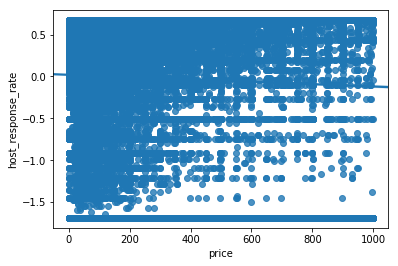

In [26]:
#Plot data
sb.regplot("price", 'host_response_rate', data = train)

In [130]:
import scipy.stats as stat
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [131]:
# Train Set Evaluation

In [132]:
good_attributes_1 = []
for attribute in head_num:
    #Linear Regression
    lm = LinearRegression()
    x=train[[attribute]]
    y=train['price']
    lm.fit(x,y)
    yhat = lm.predict(x)
    print(attribute)
    print(yhat)
    print("Intercept=",lm.intercept_)
    print("Slope=",lm.coef_)
    
    #Evaluating model
    #MSE
    MSE=mean_squared_error(train['price'],yhat)
    print("MSE=",MSE)
    #R square
    lm_li=LinearRegression()
    lm_li.fit(x,y)
    R=lm_li.score(x,y)
    print("R Square=",R)
    if R > 0.05:
        good_attributes_1.append(attribute)
    print(good_attributes_1)
    print("===========================================================================================================")

access
[133.30826859 139.09676047 139.09676047 ... 133.30826859 136.20251453
 136.20251453]
Intercept= 135.47522143096947
Slope= [2.24787125]
MSE= 22156.17926375089
R Square= 0.00022798868441997744
[]
host_response_rate
[140.70072417 140.70072417 133.40426036 ... 133.40426036 133.40426036
 133.40426036]
Intercept= 135.47830794092084
Slope= [-3.09306379]
MSE= 22151.66478404893
R Square= 0.0004316993692786708
[]
room_type
[ 83.75009421  83.75009421 167.54586493 ... 167.54586493 167.54586493
  83.75009421]
Intercept= 135.51833336931819
Slope= [-43.69125778]
MSE= 20253.05343588905
R Square= 0.08610434462368621
['room_type']
accommodates
[103.6303425  103.6303425  103.6303425  ... 103.6303425  176.50662131
 127.92243544]
Intercept= 135.5118466412113
Slope= [50.87464961]
MSE= 19569.7471403822
R Square= 0.11693775237288084
['room_type', 'accommodates']
bathrooms
[121.77843077 149.51046119 121.77843077 ... 121.77843077 121.77843077
 121.77843077]
Intercept= 135.44341310272355
Slope= [33.862240

In [133]:
# Final multi-Linear Regression
z=train[good_attributes_1]
lm.fit(z,train['price'])
yhatm=lm.predict(z)
print(yhatm)
print("MLR Intercept=",lm.intercept_)
print("MLR Slope=",lm.coef_)

[ 66.92961345  75.80950143 105.59988884 ... 176.91062726 347.04295493
  99.36929445]
MLR Intercept= 135.45449387918646
MLR Slope= [-20.16274754  23.13447245  10.84280144  -4.19081585  48.151086  ]



Multi Linear R Square= 0.2391474014795445


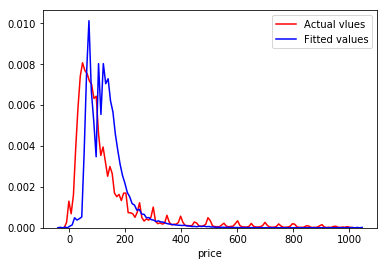

In [134]:
lm_li=LinearRegression()
lm_li.fit(z,y)
R=lm_li.score(z,y)
print("")
print("Multi Linear R Square=",R)
axm=sb.distplot(train['price'],hist=False,color="r",label="Actual vlues")
sb.distplot(yhatm,hist=False,color='b',label="Fitted values",ax=axm)

In [135]:
# Test Set Evaluation

In [136]:
good_attributes_2 = []
for attribute in head_num:
    #Linear Regression
    lm = LinearRegression()
    x=test[[attribute]]
    y=test['price']
    lm.fit(x,y)
    yhat = lm.predict(x)
    print(attribute)
    print(yhat)
    print("Intercept=",lm.intercept_)
    print("Slope=",lm.coef_)
    
    #Evaluating model
    #MSE
    MSE=mean_squared_error(test['price'],yhat)
    print("MSE=",MSE)
    #R square
    lm_li=LinearRegression()
    lm_li.fit(x,y)
    R=lm_li.score(x,y)
    print("R Square=",R)
    if R > 0.05:
        good_attributes_2.append(attribute)
    print("===========================================================================================================")

access
[133.51719866 133.51719866 133.51719866 ... 136.73430166 133.51719866
 139.95140467]
Intercept= 135.9258780330298
Slope= [2.49862434]
MSE= 22347.725920496647
R Square= 0.00027937230906893706
host_response_rate
[133.82876701 141.15978961 134.56186927 ... 133.82876701 134.56186927
 133.90207723]
Intercept= 135.91263805888485
Slope= [-3.1077137]
MSE= 22344.312924999387
R Square= 0.0004320519156189029
room_type
[167.45182544 167.45182544 167.45182544 ...  84.51935515  84.51935515
 167.45182544]
Intercept= 135.75425541965402
Slope= [-43.24113146]
MSE= 20481.27939529135
R Square= 0.08377444909531273
accommodates
[103.90042796 103.90042796 152.47941549 ... 103.90042796 152.47941549
 128.18992172]
Intercept= 135.77852088536767
Slope= [50.8692062]
MSE= 19779.334618253637
R Square= 0.11517579505780673
bathrooms
[121.85461217 121.85461217 121.85461217 ... 121.85461217 121.85461217
 121.85461217]
Intercept= 136.05755421633788
Slope= [35.1953206]
MSE= 21135.460848974846
R Square= 0.054509784

In [137]:
# Final multi-Linear Regression
z=test[good_attributes_2]
lm.fit(z,test['price'])
yhatm=lm.predict(z)
print(yhatm)
print("MLR Intercept=",lm.intercept_)
print("MLR Slope=",lm.coef_)

[134.48574638 104.87202589 145.71764272 ...  78.03933879  97.26705375
 138.54703128]
MLR Intercept= 136.02212430366345
MLR Slope= [-19.78085046  22.7697878   11.92028917  -4.63020384  49.99011486]



Multi Linear R Square= 0.2423794364762537


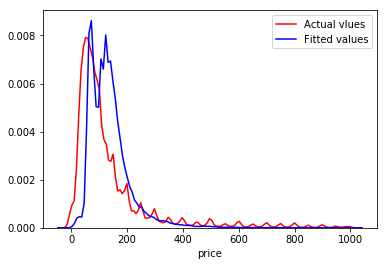

In [138]:
axm=sb.distplot(test['price'],hist=False,color="r",label="Actual vlues")
sb.distplot(yhatm,hist=False,color='b',label="Fitted values",ax=axm)
lm_li=LinearRegression()
lm_li.fit(z,y)
R=lm_li.score(z,y)
print("")
print("Multi Linear R Square=",R)

In [143]:
df_us = df_1.loc["United States"]
df_uk = df_1.loc["United Kingdom"]
df_fran = df_1.loc["France"]
df_spa = df_1.loc["Spain"]
df_aus = df_1.loc["Australia"]
df_ita = df_1.loc["Italy"]

df_ita.head()

access  host_response_rate  room_type  accommodates  bathrooms  \
country                                                                     
Italy    0.323547            0.670548   1.184865     -0.149179  -0.403546   
Italy    1.611097           -1.688428   1.184865     -0.626668  -0.403546   
Italy   -0.964002            0.670548  -0.733042      0.328311  -0.403546   
Italy   -0.964002            0.670548   1.184865     -0.149179  -0.403546   
Italy    0.323547            0.670548  -0.733042      1.283289   1.234386   

             beds  bed_type  amenities  security_deposit  cleaning_fee  \
country                                                                  
Italy    0.717845 -0.176988  -0.160693         -0.650088     -0.589430   
Italy   -0.625217 -0.176988  -0.160693         -0.650088     -0.589430   
Italy    0.046314 -0.176988  -0.343651          1.071353      0.151059   
Italy   -0.625217 -0.176988   0.388182         -0.650088     -0.293235   
Italy    2.732439 -0.176988   1.120015          1.071353      0.151059   

         guests_included  extra_people  minimum_nights  maximum_nights  \
country                                                                  
Italy          -0.449694     -0.386495       -0.027600       -0.010282   
Italy          -0.449694     -0.386495       -0.027600       -0.010282   
Italy          -0.449694     -0.386495       -0.005317       -0.010334   
Italy           0.366398      0.420771       -0.027600       -0.010282   
Italy           1.998582      0.259318       -0.016458       -0.010337   

         number_of_reviews  review_scores_rating  cancellation_policy  price  
country                                                                       
Italy            -0.517536             -1.668768             0.152182     99  
Italy            -0.517536             -1.668768             1.392691    100  
Italy            -0.208613              0.364071            -1.088327    160  
Italy            -0.146828              0.509274             1.392691     69  
Italy             1.922958              0.606076             1.392691    220

In [144]:
#Train Test Split For Sample Countries
from sklearn.model_selection import train_test_split
train_us, test_us = train_test_split( df_us, test_size=0.2, random_state=4)
print("US")
print ('Train set:', train_us.shape)
print ('Test set:', test_us.shape)
print("="* 30)
train_uk, test_uk = train_test_split( df_uk, test_size=0.2, random_state=4)
print("UK")
print ('Train set:', train_uk.shape)
print ('Test set:', test_uk.shape)
print("="* 30)
train_fran, test_fran = train_test_split( df_fran, test_size=0.2, random_state=4)
print("France")
print ('Train set:', train_fran.shape)
print ('Test set:', test_fran.shape)
print("="* 30)
train_spa, test_spa = train_test_split( df_spa, test_size=0.2, random_state=4)
print("Spain")
print ('Train set:', train_spa.shape)
print ('Test set:', test_spa.shape)
print("="* 30)
train_aus, test_aus = train_test_split( df_aus, test_size=0.2, random_state=4)
print("Australia")
print ('Train set:', train_aus.shape)
print ('Test set:', test_aus.shape)
print("="* 30)
train_ita, test_ita = train_test_split( df_ita, test_size=0.2, random_state=4)
print("Italy")
print ('Train set:', train_ita.shape)
print ('Test set:', test_ita.shape)
print("="* 30)

train_ls = [train_us, train_uk, train_fran, train_spa, train_aus, train_ita]
test_ls = [test_us, test_uk, test_fran, test_spa, test_aus, test_ita]

US
Train set: (107043, 18)
Test set: (26761, 18)
UK
Train set: (48666, 18)
Test set: (12167, 18)
France
Train set: (45093, 18)
Test set: (11274, 18)
Spain
Train set: (36464, 18)
Test set: (9117, 18)
Australia
Train set: (32286, 18)
Test set: (8072, 18)
Italy
Train set: (26383, 18)
Test set: (6596, 18)


MLR Intercept= 151.7274561913635
MLR Slope= [-28.09219404  30.90394791  13.67769105   2.22655484  20.54203082
   0.98369406]
{'room_type': 'R Score: 0.172', 'accommodates': 'R Score: 0.258', 'bathrooms': 'R Score: 0.13', 'beds': 'R Score: 0.181', 'cleaning_fee': 'R Score: 0.178', 'guests_included': 'R Score: 0.086'}

Multi Linear R Square= 0.3247753249562081


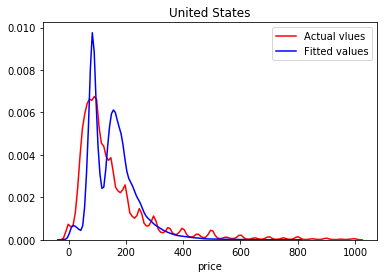

MLR Intercept= 109.24467119292188
MLR Slope= [-18.29846917  27.5564545   15.67123085   1.34495036   6.41009293
  31.49079909  -4.51494943]
{'room_type': 'R Score: 0.274', 'accommodates': 'R Score: 0.39', 'bathrooms': 'R Score: 0.174', 'beds': 'R Score: 0.272', 'security_deposit': 'R Score: 0.129', 'cleaning_fee': 'R Score: 0.254', 'guests_included': 'R Score: 0.073'}

Multi Linear R Square= 0.5050049160048662


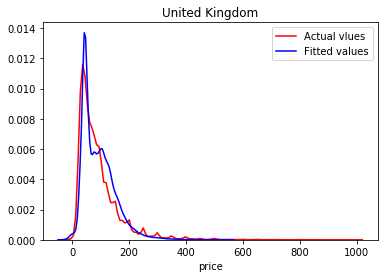

MLR Intercept= 118.44050745592881
MLR Slope= [34.07218819 26.91817778  8.71584721  6.36980759 36.18245484 -2.61598398]
{'accommodates': 'R Score: 0.317', 'bathrooms': 'R Score: 0.198', 'beds': 'R Score: 0.249', 'amenities': 'R Score: 0.059', 'cleaning_fee': 'R Score: 0.18', 'guests_included': 'R Score: 0.075'}

Multi Linear R Square= 0.42387958503575596


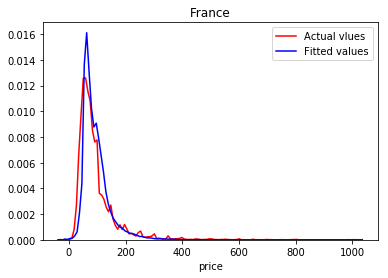

MLR Intercept= 84.40039508646322
MLR Slope= [-13.8644204   24.05131165  18.01540315  -0.54591882   5.54495872
  16.48890815  -0.63762195]
{'room_type': 'R Score: 0.177', 'accommodates': 'R Score: 0.389', 'bathrooms': 'R Score: 0.299', 'beds': 'R Score: 0.317', 'security_deposit': 'R Score: 0.095', 'cleaning_fee': 'R Score: 0.126', 'guests_included': 'R Score: 0.085'}

Multi Linear R Square= 0.45553547886942464


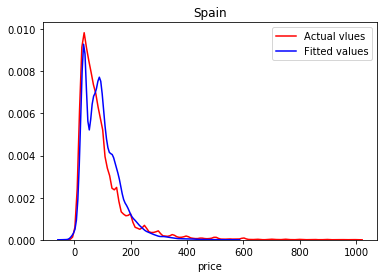

MLR Intercept= 160.78780920742048
MLR Slope= [-33.01165701  42.26509084  16.66440852   8.30302322  17.79709616
  -6.546878  ]
{'room_type': 'R Score: 0.218', 'accommodates': 'R Score: 0.345', 'bathrooms': 'R Score: 0.169', 'beds': 'R Score: 0.274', 'cleaning_fee': 'R Score: 0.194', 'guests_included': 'R Score: 0.058'}

Multi Linear R Square= 0.41653872748261644


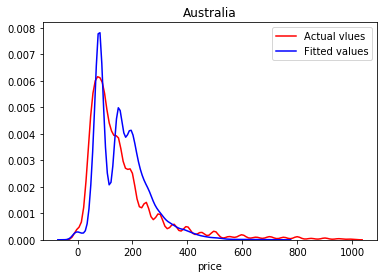

MLR Intercept= 97.92491441050193
MLR Slope= [-7.67667135 18.18300465 16.84217202 -4.14724523 12.1760708  12.36116349
  1.98602284]
{'room_type': 'R Score: 0.095', 'accommodates': 'R Score: 0.205', 'bathrooms': 'R Score: 0.176', 'beds': 'R Score: 0.121', 'security_deposit': 'R Score: 0.065', 'cleaning_fee': 'R Score: 0.091', 'guests_included': 'R Score: 0.075'}

Multi Linear R Square= 0.27897188714816834


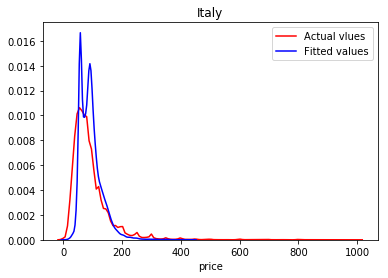

In [145]:
country_ls = ["United States", "United Kingdom", "France", "Spain", "Australia", "Italy"]
ind = 0
for train_count in train_ls:
    good_attributes_g1 = []
    good_attributes_g2 = {}
    for attribute in head_num:
        #Linear Regression
        lm = LinearRegression()
        x=train_count[[attribute]]
        y=train_count['price']
        lm.fit(x,y)
        yhat = lm.predict(x)
        #print(attribute)
        #print(yhat)
        #print("Intercept=",lm.intercept_)
        #print("Slope=",lm.coef_)

        #Evaluating model
        #MSE
        MSE=mean_squared_error(train_count['price'],yhat)
        #print("MSE=",MSE)
        #R square
        lm_li=LinearRegression()
        lm_li.fit(x,y)
        R=lm_li.score(x,y)
        #print("R Square=",R)
        if R > 0.05:
            good_attributes_g1.append(attribute)
            R = round(R, 3)
            good_attributes_g2[attribute] = "R Score: " + str(R)
        #print("===========================================================================================================")
    
    # Final multi-Linear Regression
    z=train_count[good_attributes_g1]
    lm.fit(z,train_count['price'])
    yhatm=lm.predict(z)
    print("MLR Intercept=",lm.intercept_)
    print("MLR Slope=",lm.coef_)
    #print("===========================================================================================================")
    print(good_attributes_g2)
    lm_li=LinearRegression()
    lm_li.fit(z,y)
    R=lm_li.score(z,y)
    print("")
    print("Multi Linear R Square=",R)
    axm=sb.distplot(train_count['price'],hist=False,color="r",label="Actual vlues")
    sb.distplot(yhatm,hist=False,color='b',label="Fitted values",ax=axm).set_title(country_ls[ind])
    plt.show()
    ind += 1


MLR Intercept= 150.97554056358285
MLR Slope= [-27.89098118  29.17003686  13.05602178   2.9321021   22.66654496
  -0.45079301]
{'room_type': 'R Score: 0.17', 'accommodates': 'R Score: 0.245', 'bathrooms': 'R Score: 0.122', 'beds': 'R Score: 0.172', 'cleaning_fee': 'R Score: 0.177', 'guests_included': 'R Score: 0.078'}

Multi Linear R Square= 0.31697451760196793


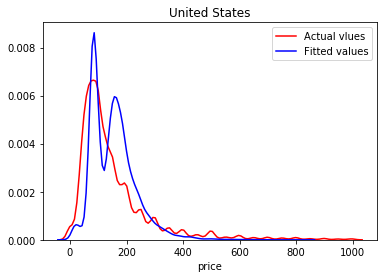

MLR Intercept= 109.32594792541451
MLR Slope= [-17.49103843  24.69723128  15.75441673   6.65072093   7.07958211
  31.77572247  -3.57370148]
{'room_type': 'R Score: 0.272', 'accommodates': 'R Score: 0.419', 'bathrooms': 'R Score: 0.204', 'beds': 'R Score: 0.315', 'security_deposit': 'R Score: 0.133', 'cleaning_fee': 'R Score: 0.275', 'guests_included': 'R Score: 0.079'}

Multi Linear R Square= 0.5382237215258936


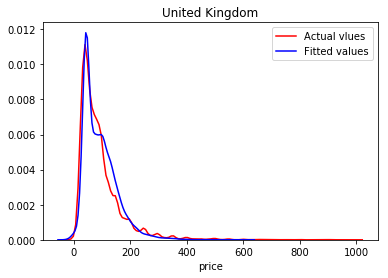

MLR Intercept= 118.38647371913287
MLR Slope= [36.29301752 25.81997626  7.5707501   4.68249187 40.62360704 -1.71988472]
{'accommodates': 'R Score: 0.34', 'bathrooms': 'R Score: 0.194', 'beds': 'R Score: 0.252', 'amenities': 'R Score: 0.055', 'cleaning_fee': 'R Score: 0.201', 'guests_included': 'R Score: 0.081'}

Multi Linear R Square= 0.4512593585402396


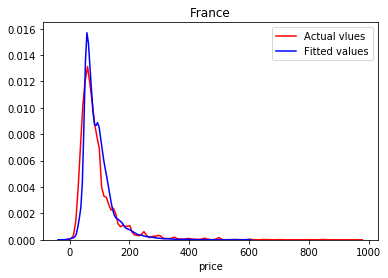

MLR Intercept= 84.62963352124092
MLR Slope= [-13.81897952  22.6017876   20.90415148  -1.31590798   4.34814017
  19.86227831  -0.288169  ]
{'room_type': 'R Score: 0.185', 'accommodates': 'R Score: 0.402', 'bathrooms': 'R Score: 0.335', 'beds': 'R Score: 0.329', 'security_deposit': 'R Score: 0.095', 'cleaning_fee': 'R Score: 0.129', 'guests_included': 'R Score: 0.076'}

Multi Linear R Square= 0.48786499223014557


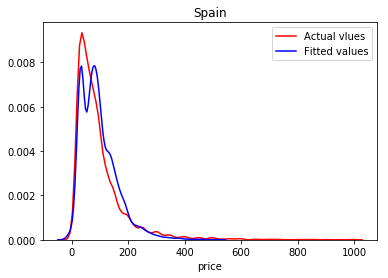

MLR Intercept= 160.67914390914868
MLR Slope= [-33.49034333  41.00105015  15.48920735  10.62287634  14.36277763
  -2.1282745 ]
{'room_type': 'R Score: 0.21', 'accommodates': 'R Score: 0.343', 'bathrooms': 'R Score: 0.169', 'beds': 'R Score: 0.271', 'cleaning_fee': 'R Score: 0.184', 'guests_included': 'R Score: 0.071'}

Multi Linear R Square= 0.4036579468511329


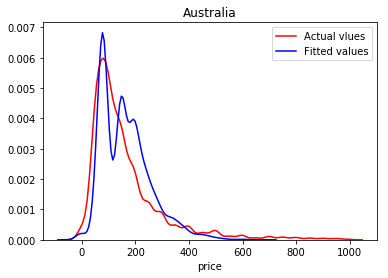

MLR Intercept= 97.97270825709411
MLR Slope= [-8.10601108 19.79072701 19.99289155 -4.14570155  9.70773845 14.35786769
 -0.66617777]
{'room_type': 'R Score: 0.103', 'accommodates': 'R Score: 0.241', 'bathrooms': 'R Score: 0.222', 'beds': 'R Score: 0.149', 'security_deposit': 'R Score: 0.058', 'cleaning_fee': 'R Score: 0.102', 'guests_included': 'R Score: 0.068'}

Multi Linear R Square= 0.3257653364976617


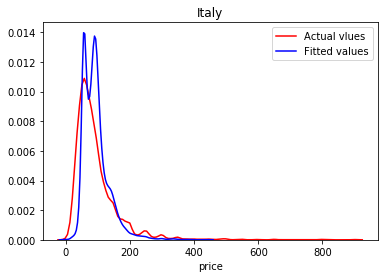

In [146]:
country_ls = ["United States", "United Kingdom", "France", "Spain", "Australia", "Italy"]
ind = 0
for test_count in test_ls:
    good_attributes_g1 = []
    good_attributes_g2 = {}
    for attribute in head_num:
        #Linear Regression
        lm = LinearRegression()
        x=test_count[[attribute]]
        y=test_count['price']
        lm.fit(x,y)
        yhat = lm.predict(x)
        #print(attribute)
        #print(yhat)
        #print("Intercept=",lm.intercept_)
        #print("Slope=",lm.coef_)

        #Evaluating model
        #MSE
        MSE=mean_squared_error(test_count['price'],yhat)
        #print("MSE=",MSE)
        #R square
        lm_li=LinearRegression()
        lm_li.fit(x,y)
        R=lm_li.score(x,y)
        #print("R Square=",R)
        if R > 0.05:
            good_attributes_g1.append(attribute)
            R = round(R, 3)
            good_attributes_g2[attribute] = "R Score: " + str(R)
        #print("===========================================================================================================")
    
    # Final multi-Linear Regression
    z=test_count[good_attributes_g1]
    lm.fit(z,test_count['price'])
    yhatm=lm.predict(z)
    print("MLR Intercept=",lm.intercept_)
    print("MLR Slope=",lm.coef_)
    #print("===========================================================================================================")
    print(good_attributes_g2)
    lm_li=LinearRegression()
    lm_li.fit(z,y)
    R=lm_li.score(z,y)
    print("")
    print("Multi Linear R Square=",R)
    axm=sb.distplot(test_count['price'],hist=False,color="r",label="Actual vlues")
    sb.distplot(yhatm,hist=False,color='b',label="Fitted values",ax=axm).set_title(country_ls[ind])
    plt.show()
    ind += 1